# What is a Bayes net?

A Bayes net - or Bayesian network - is a probabilistic graphical model, or PGM. It is a simple and intuitive way to represent a joint probability distribution by specifying conditional probability distributions for the underlying variables in the network. Bayes nets can represent both discrete and continuous variables, though we will focus initially on networks with only discrete variables. 

We'll use two toy examples to explore the implementation.

1. The alarm network: https://github.com/jpmcarrilho/AIMA/blob/master/probability-4e.ipynb 
    _The story, from Judea Pearl, is that there is a house burglar alarm, which can be triggered by either a burglary or an earthquake. If the alarm sounds, one or both of the neighbors, John and Mary, might call the owner to say the alarm is sounding._

2. This one also looked fun! https://www.cs.cmu.edu/afs/cs.cmu.edu/project/learn-43/lib/photoz/.g/web/glossary/bayesnet.html


# Representing a Bayes net in code

Conceptually a Bayes net is simple; all we need is the node mappings, or dependencies, and the probabilities that define the conditional / unconditional probability distributions.  

In terms of defining a structure, we will look to capture the key attributes.

|Attribute |Description| 
|-----|-----|
| _names_ |Maps a convenient shorthand node label to the to the full text e.g. A for Alarm  |
|_dependencies_|Maps nodes to their dependents |
|_parents_|Maps nodes to their parents |
|_conditional_probabilities_|Maps nodes to their conditional probabilities |
|_independent_nodes_|Set of nodes with no parents |
|_leaf_nodes_|Set of nodes with no dependencies |

We can use a dataclass to represent this structure for the two examples. In this case we are constructing the network manually, but later we will generalise the process such that the structure can be generated from a minimal representation i.e. the conditional probabilities. For now the conditional probabilities will be set as None.

In [43]:
from dataclasses import dataclass


@dataclass
class BayesNet:
    """Class for representing a Bayes net."""
    names: dict
    dependencies: dict
    parents: dict
    conditional_probabilities: dict
    independent_nodes: set
    leaf_nodes: set

In [44]:
bayesnet_alarm = BayesNet(names={
    'B': 'Burglary',
    'E': 'Earthquake',
    'A': 'Alarm',
    'M': 'Mary calls',
    'J': 'John calls'
},
    dependencies={
    'B': ['A'],
    'E': ['A'],
    'A': ['M', 'J']
},
    parents={
    'M': ['A'],
    'J': ['A'],
    'A': ['B', 'E']
},
    conditional_probabilities=None,
    independent_nodes={'B', 'E'},
    leaf_nodes={'M', 'J'})

In [45]:
bayesnet_mars = BayesNet(names={
    'V': 'Visited Mars',
    'C': 'Common cold',
    'M': 'Martian death flu',
    'R': 'Runny nose',
    'H': 'Headache',
    'S': 'Spontaneous combustion'
},
    dependencies={
    'V': ['M'],
    'M': ['R', 'H', 'S'],
    'C': ['R', 'H']
},
    parents={
    'R': ['C'],
    'H': ['C', 'M'],
    'S': ['M'],
    'M': ['V']
},
    conditional_probabilities=None,
    independent_nodes={'V', 'C'},
    leaf_nodes={'R', 'H', 'S'})

# Visualising a Bayes net

Seeing a network makes it easier to interpret. The package graphviz is a useful tool to help us; all we need to do is specify the nodes, and the edges between nodes, which we can extract from the attributes.

In [46]:
import graphviz

def visualise_bn(bn: BayesNet, use_full_names: bool):
    """Visualises Bayes net object."""
    g = graphviz.Digraph()
    for node, next_nodes in bn.dependencies.items():
        for nn in next_nodes:
            if use_full_names:
                g.edge(bn.names[node], bn.names[nn])
            else:
                g.edge(node, nn)
    return g

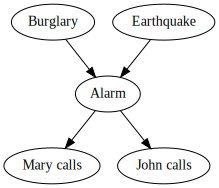

In [47]:
visualise_bn(bn=bayesnet_alarm, use_full_names=True)

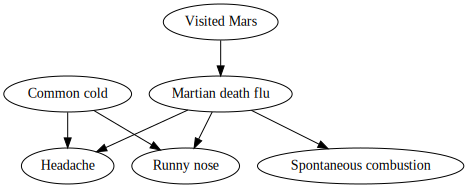

In [48]:
visualise_bn(bn=bayesnet_mars, use_full_names=True)

# Specifying the joint probability distribution via conditional probabilities

# Parsing conditional probabilities to initialise a Bayes net

# Simulating a Bayes net

# Visualising results

# Inference from simulation

# Testing the implementation

# Extending the implementation